# Overfitting and Underfitting
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

Task 4: With the help of the given code and references complete all of the following step:
1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
2) Try to resolve the overfitting.
3) Calculate the Validation score by any two or three given techniques and Validation iterators.
4) Generate the validation curve
5) Predict the output of testing data.
6) Generate the ROC curve using the predicted data and actual data.

In [1]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

### 1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.

>1, train: 0.940, test: 0.901
>2, train: 0.965, test: 0.942
>3, train: 0.985, test: 0.959
>4, train: 0.985, test: 0.953
>5, train: 0.992, test: 0.953
>6, train: 0.997, test: 0.959
>7, train: 1.000, test: 0.965
>8, train: 1.000, test: 0.959
>9, train: 1.000, test: 0.959
>10, train: 1.000, test: 0.965
>11, train: 1.000, test: 0.953
>12, train: 1.000, test: 0.971
>13, train: 1.000, test: 0.965
>14, train: 1.000, test: 0.953
>15, train: 1.000, test: 0.971
>16, train: 1.000, test: 0.953
>17, train: 1.000, test: 0.965
>18, train: 1.000, test: 0.965
>19, train: 0.997, test: 0.953
>20, train: 1.000, test: 0.959
>21, train: 1.000, test: 0.965
>22, train: 1.000, test: 0.953
>23, train: 1.000, test: 0.971
>24, train: 1.000, test: 0.965
>25, train: 1.000, test: 0.965
>26, train: 1.000, test: 0.959
>27, train: 1.000, test: 0.959
>28, train: 1.000, test: 0.959
>29, train: 1.000, test: 0.953
>30, train: 1.000, test: 0.959


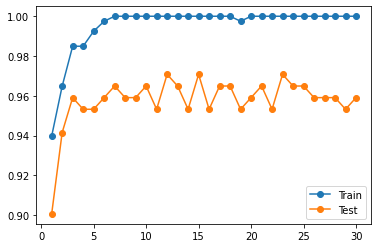

In [33]:
# create dataset
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
X, y = load_breast_cancer(return_X_y=True)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 31)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### 2) Try to resolve the overfitting.
### The depth of the tree increases, performance on train and test will improve to a point, and as the tree gets too deep, it will begin to overfit the training dataset at the expense of worse performance on the test set.
### We would choose a tree depth of 7 before the model begins to overfit the training dataset.

In [34]:
values = [i for i in range(1,10)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.935, test: 0.889
>2, train: 0.955, test: 0.912
>3, train: 0.982, test: 0.918
>4, train: 0.990, test: 0.936
>5, train: 0.997, test: 0.930
>6, train: 1.000, test: 0.924
>7, train: 1.000, test: 0.912
>8, train: 1.000, test: 0.924
>9, train: 1.000, test: 0.918


###  3) Calculate the Validation score by any two or three given techniques and Validation iterators.

In [35]:
#basic method is calculate score
model.score(X_test, y_test)

0.9181286549707602

In [36]:
# Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores


array([0.9122807 , 0.9122807 , 0.92105263, 0.95614035, 0.89380531])

In [37]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.02


In [38]:
#  Using the different scoring parameter
from sklearn import metrics

scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
scores


array([0.89941445, 0.9066492 , 0.91474865, 0.94345238, 0.89000649])

In [39]:
#k fold vaidation iterator

import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 36

In [40]:
#leaveoneout validation iterator
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

Streaming output truncated to the last 5000 lines.
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559 560 561 562 563 564 565 566 567 568] [412]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95 

In [41]:
#repeated k fold
import numpy as np
from sklearn.model_selection import RepeatedKFold
random_state = 100000
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[  1   2   5   7  10  16  19  21  22  24  28  29  30  32  36  37  38  39
  40  41  45  46  47  49  50  53  54  55  56  60  64  65  66  67  68  69
  71  73  74  76  78  81  82  84  85  86  88  90  91  93  96 102 104 106
 107 108 109 115 116 118 120 123 126 128 130 131 133 134 138 139 140 141
 142 143 149 150 152 153 154 156 157 158 159 160 164 169 175 176 177 178
 181 182 186 187 188 190 192 194 196 197 198 202 208 210 213 214 216 217
 221 223 227 228 229 230 232 233 236 238 239 241 242 243 244 248 249 251
 253 254 255 256 258 261 262 266 272 273 279 280 282 284 286 287 289 290
 293 294 301 302 304 307 308 311 314 315 317 318 322 326 328 329 330 334
 336 337 339 340 342 343 347 349 350 351 352 353 354 355 360 364 365 366
 369 372 373 374 375 377 387 389 390 391 393 395 396 397 400 401 402 403
 405 406 407 409 410 413 414 415 416 418 420 423 424 425 426 427 428 429
 433 436 439 442 443 450 451 452 454 455 457 458 463 465 466 468 469 471
 472 473 475 478 479 480 483 484 485 486 487 489 49

### 4) Generate the validation curve 

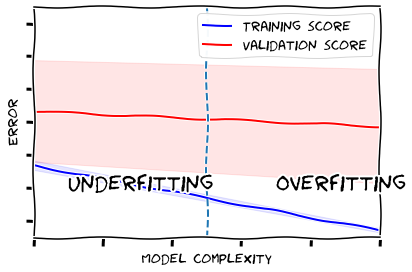

In [107]:
# Number of folds for cross validation
from sklearn.model_selection import validation_curve
ticks = np.logspace(-1,21,20)
train_scores, test_scores = validation_curve(model, X, y, param_name="max_depth", param_range=ticks,cv=10)
plot_validation_curve(ticks, train_scores, test_scores)

In [90]:
def plot_validation_curve(ticks, train_scores, test_scores):
    plt.xkcd()
    ax = plot_curve(ticks, train_scores, test_scores)
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


### 5) Predict the output of testing data.

In [111]:
predictions = model.predict(X_test)
correct_predictions = np.nonzero(predictions == y_test)[0]
incorrect_predictions = np.nonzero(predictions != y_test)[0]
print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

157  classified correctly
14  classified incorrectly


###  6) Generate the ROC curve using the predicted data and actual data.

[1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0.]


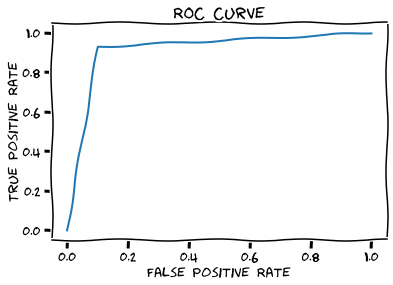

In [112]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
print(y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()